# Week 2 Practical: Supervised Learning

**Concepts:**
- K-Nearest neighbors
- Decision Trees

**Aims:**
- To apply k-NN and decision trees as examples of supervised learning models for classification and regression problems.

- To get some insight into the trained models, including the influence of a hyperparameter in an ML model.

- To produce some assessable work for this subject.

**Note:**

*that for this prac, you are not expected to implement the machine learning algorithms/models from first principles. You may use existing machine learning libraries/toolkits and refer to the documentation for those libraries. You can also choose to use tools like ChatGPT to help you. However, if you want to learn something, you will need to be able to analyse the code produced by ChatGPT to verify that it works as you intended and to be able to modify it if necessary to complete the prac questions. Your understanding of this code and the work that you do will be evaluated in the prac demos.*

**Solutions by:** Ethan Jones


---

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Question 2
from sklearn.model_selection import train_test_split

# Question 3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Read in the data
classification_data = pd.read_csv('Datasets/w3classif.csv',  
                                  names=['x_1', 'x_2', 'y'])

regression_data = pd.read_csv('Datasets/w3regr.csv', 
                              names=['x', 'y'])

In [4]:
classification_data.head()

,x_1,x_2,y
0,0.475861,0.541139,0
1,1.412233,-1.540877,0
2,0.022608,-0.203143,0
3,-0.047869,-0.499965,0
4,1.701335,0.383024,0


In [5]:
# Show the first few rows of the data to get an idea of what we're working with
classification_data.head(n=5) # n=5 is the default.

# USE 'print(classification_data.head())' if you're not using a notebook.

,x_1,x_2,y
0,0.475861,0.541139,0
1,1.412233,-1.540877,0
2,0.022608,-0.203143,0
3,-0.047869,-0.499965,0
4,1.701335,0.383024,0


**Learn more about Pandas:**
- [Pandas Functions in Python: A Toolkit for Data Analysis](https://www.geeksforgeeks.org/pandas-functions-in-python/)
- [Pandas documentation](https://pandas.pydata.org/docs/)


---

**Question 1:** Make scatterplots of each dataset so you can see what they look like.

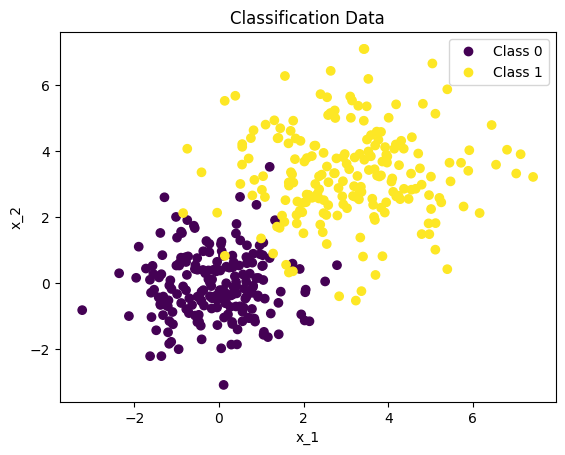

In [6]:
# Scatter plot of the classification data
cls_scatter_fig = plt.figure()
cls_scatter = plt.scatter(classification_data['x_1'], 
                          classification_data['x_2'], 
                          c=classification_data['y'])
                    
# Formatting
plt.title('Classification Data')
plt.legend(handles=cls_scatter.legend_elements()[0], 
           labels=['Class 0', 'Class 1'])
plt.xlabel('x_1')
plt.ylabel('x_2')

plt.show()

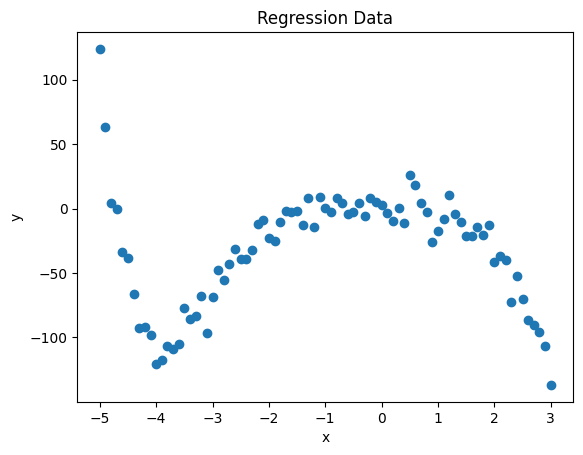

In [7]:
# Scatter plot of the regression data
reg_scatter_fig = plt.figure()
reg_scatter = plt.scatter(regression_data['x'],
                          regression_data['y'])

# Formatting
plt.title('Regression Data')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

**Documentation:**

[matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

---

**Question 2:** Randomly shuffle the datasets (i.e. the order of the rows) and split them each into 70% (for training) and 30% (for testing).

In [8]:
cls_data_features = classification_data.drop('y', axis=1)
cls_data_labels = classification_data['y']

X_train, X_test, y_train, y_test = train_test_split(cls_data_features, # Features 
                                                    cls_data_labels, # Labels
                                                    test_size=0.3, # 30% of the data is reserved for testing
                                                    shuffle=True, # Shuffle the data before splitting (True by default)
                                                    random_state=4702) # Random seed for reproducibility, Student number is common practice in assessments


# Interesting prints
print("Training set:", X_train.shape) # Prints: (Number of samples, Number of features)
print("Training lables: ", y_train.shape) # Prints: (Number of samples,)

print('\n')

print(X_train) # Prints the training set, notice shuffled order of indices


Training set: (280, 2)
Training lables:  (280,)


          x_1       x_2
2    0.022608 -0.203143
237  3.220783  2.620842
231  5.114867  5.134441
55  -1.627323 -2.203264
87   0.409334 -0.084292
..        ...       ...
393  0.754622  4.397236
316  2.546952  1.190956
220  3.144589  5.534099
89   0.317317  0.841246
60   2.024333 -1.122312

[280 rows x 2 columns]


**Documentation:**

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

---

## K-Nearest Neighbors

**Question 3.A:** Build a k-NN classifier with k = 3 for dataset w3classif.csv and find the training and test loss (i.e. misclassification rate).

In [10]:
# KNN Classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


y_trian_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_trian_pred) 
train_loss = 1 - train_accuracy 

y_test_pred = knn.predict(X_test) 
test_accuracy = accuracy_score(y_test, y_test_pred) 
test_loss = 1 - test_accuracy

print("Training Misclassification Rate: {:.4f}%".format(train_loss * 100))
print("Testing Misclassification Rate: {:.4f}%".format(test_loss * 100))

Training Misclassification Rate: 3.2143%
Testing Misclassification Rate: 6.6667%


**Documentation:**

[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

**Question 3.B:** Plot the decision regions for your classifier together with the training and/or test data points.

C:\Users\Ethan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


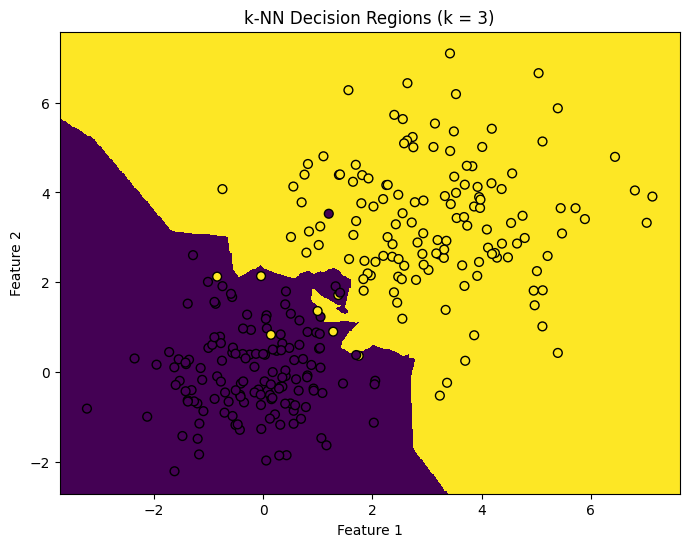

In [15]:
from matplotlib.colors import ListedColormap

# Select the first two features for visualization
X1_train, X2_train = X_train.iloc[:, 0], X_train.iloc[:, 1]

# Generate a meshgrid over the feature space
h = 0.02  # Step size for meshgrid
x_min, x_max = X1_train.min() - 0.5, X1_train.max() + 0.5
y_min, y_max = X2_train.min() - 0.5, X2_train.max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Ensure k is defined
k = 3  # Or set dynamically based on your model

# Predict class labels for the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, shading='auto')

# Plot training data points
plt.scatter(X1_train, X2_train, c=y_train, edgecolor='k', s=40)

# Labels and title
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-NN Decision Regions (k = {k})')

plt.show()

**Question 3.C:** Experiment with different k values and see how it affects the loss values and the decision regions.

---

**Question 4:** Make scatterplots of each dataset so you can see what they look like.

---

## Decision Trees

**Question 5:** Make scatterplots of each dataset so you can see what they look like.

---

**Question 6:** Make scatterplots of each dataset so you can see what they look like.